In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import wfdb
import pywt

import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [55]:
len_sig = 1280

##### Model

In [37]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(211,24)))
model.add(tf.keras.layers.Conv1D(filters=40,kernel_size=(5),strides=1))
model.add(tf.keras.layers.MaxPool1D(pool_size=2,strides=2,padding="valid"))
model.add(tf.keras.layers.Conv1D(filters=32,kernel_size=(3),strides=1))
model.add(tf.keras.layers.MaxPool1D(pool_size=2,strides=2,padding="valid"))
model.add(tf.keras.layers.LSTM(units=32,return_sequences=True,recurrent_dropout=0.25,dropout=0.5))
model.add(tf.keras.layers.LSTM(units=16,return_sequences=True,recurrent_dropout=0.25))
model.add(tf.keras.layers.LSTM(units=4,return_sequences=False))
model.add(tf.keras.layers.Dense(1))

In [ ]:
model.summary()

##### Reading the data EDA

In [11]:
# dir_path = "C:\\Users\\123na\\Downloads\\Heart Disease prediction\\Data"
# file_name ="f2y05.dat"

signals, fields = wfdb.rdsamp(r"C:\Users\123na\Downloads\Heart Disease prediction\Data\Healthy\f2y08",sampfrom=0)

In [96]:
signals.shape[0]/1285

1366.0389105058366

In [75]:
fields

{'fs': 250,
 'sig_len': 1755360,
 'n_sig': 3,
 'base_date': None,
 'base_time': None,
 'units': ['mV', 'mV', 'mV'],
 'sig_name': ['RESP', 'ECG', 'BP'],
 'comments': ['Age: 25 Sex: F']}

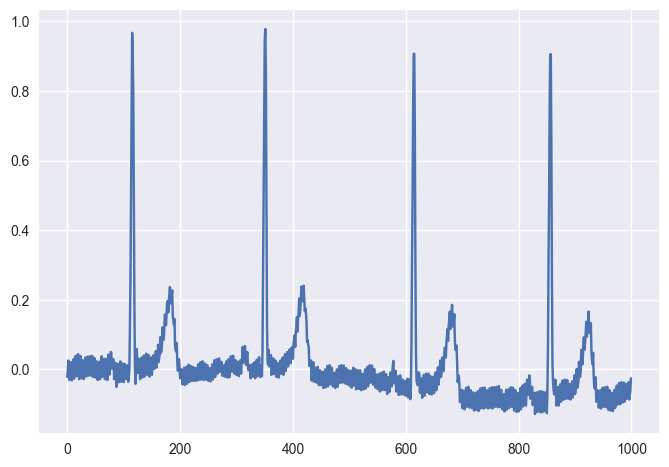

In [188]:
plt.plot(signals.T[1][3000:4000])
# plt.plot(signals.T[1][1800:3000])
# plt.plot(signals.T[2][:1000])
plt.show()

In [7]:
signals1, fields1 = wfdb.rdsamp(r"C:\Users\123na\Downloads\Heart Disease prediction\Data\CAD\I01",sampfrom=0)

In [13]:
signals1.shape

(462600, 12)

In [108]:
for key in fields1.keys():
    print(key)

fs
sig_len
n_sig
base_date
base_time
units
sig_name
comments


In [114]:
fields1["sig_name"]

['I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

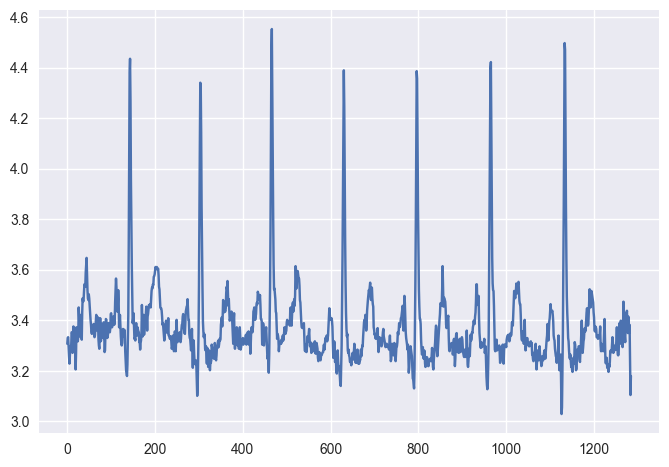

In [158]:
plt.plot(signals1.T[0][3*1285:4*1285])
plt.show()

In [164]:
def wavelet_transform(arr):
    coefficient = pywt.wavedec(arr,wavelet='db6',level=5)
    coefficient[0] = np.zeros_like(coefficient[0])
    transformed_signal = pywt.waverec(coefficient,wavelet='db6')

    return np.array(transformed_signal)

In [165]:
def augment_signal(arr):
    # Normalization
    arr = (arr-np.mean(arr))/np.std(arr)

    # Generate random sinusoidal noise signal
    starting_phase = np.random.uniform(-180, -90)
    # ending_phase = np.random.uniform(90, 180)      # I am not using this ending phase part here
    amplitude = np.random.uniform(-2, 2)
    time = np.arange(len(arr))  
    sinusoidal_noise_signal = amplitude * np.sin(2 * np.pi * time + np.radians(starting_phase))

    # Generate random Gaussian noise signal
    gaussian_noise_signal = np.random.normal(0, 0.05, len(arr))

    arr = arr + sinusoidal_noise_signal + gaussian_noise_signal

In [132]:
def make_img(arr):
    result = []
    idx=0
    for i in range(0,24):
        result.append(arr[idx:idx+211])
        idx+=40

    return np.array(result)